<a href="https://colab.research.google.com/github/mallelamanojkumar90/AIML/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **K-Means Clustering - Customer Segmentation based on spending patterns**

**Category:** Unsupervised Learning (Clustering)

**Description:**
Groups similar data points into k clusters based on distance measures.

**Key Components:**
- Distance Metric: Euclidean Distance
- Optimization: Minimize inertia
- Hyperparameters: Number of clusters (k)

**Example Application:**

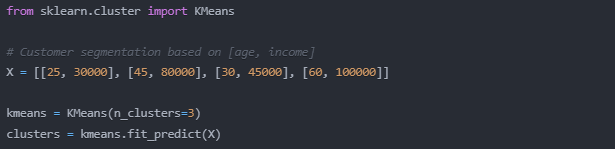

**Best Used For:**
- Customer segmentation
- Image compression
- Document clustering
- Anomaly detection


**Implementation Steps to include:**

**Data Preparation:**

Loading and preprocessing the Mall Customer dataset
Feature scaling
Exploratory data analysis


**Clustering Analysis:**

Optimal cluster selection using elbow method and silhouette score
K-means clustering implementation
2D and 3D visualization of clusters


**Cluster Evaluation:**

Detailed cluster profiling
Feature distribution analysis
Gender distribution across clusters
Cluster size analysis


**Visualizations:**

Distribution plots
Correlation heatmap
Scatter plots
3D interactive plots
Box plots for cluster analysis

**Future Improvements to do:**
1. Add more advanced clustering techniques for comparison?
2. Include additional evaluation metrics?
3. Add more visualization techniques?
4. Implement feature importance analysis?
5. Add hierarchical clustering comparison?

In [1]:
# Required libraries
!pip install pandas numpy matplotlib seaborn scikit-learn plotly

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import warnings
warnings.filterwarnings('ignore')

In [3]:
import os

# Ensure the .kaggle directory exists
!mkdir -p ~/.kaggle

# Copy kaggle.json from the specified path
!cp /kaggle/kaggle.json ~/.kaggle/

# Set appropriate permissions for the kaggle.json file
!chmod 600 ~/.kaggle/kaggle.json

# Download the dataset
!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python

# Unzip the downloaded dataset
!unzip customer-segmentation-tutorial-in-python.zip

Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 2.12MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      


In [4]:
class CustomerSegmentation:
    def __init__(self):
        """Initialize Customer Segmentation Analysis"""
        self.df = None
        self.scaled_features = None
        self.scaler = None
        self.kmeans = None
        self.optimal_clusters = None

    def load_data(self):
        """Load Mall Customer Segmentation Data"""
        # For Colab, first upload the dataset or use these commands:
        '''
        !pip install kaggle
        !mkdir -p ~/.kaggle
        !cp kaggle.json ~/.kaggle/
        !chmod 600 ~/.kaggle/kaggle.json
        !kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python
        !unzip customer-segmentation-tutorial-in-python.zip
        '''

        self.df = pd.read_csv('Mall_Customers.csv')
        print("Dataset Shape:", self.df.shape)
        print("\nSample Data:")
        print(self.df.head())
        print("\nData Info:")
        print(self.df.info())

        return self.df

    def preprocess_data(self):
        """Preprocess the data for clustering"""
        # Rename columns for clarity
        self.df.columns = ['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score']

        # Create feature matrix
        features = ['Age', 'Annual_Income', 'Spending_Score']
        X = self.df[features]

        # Scale the features
        self.scaler = StandardScaler()
        self.scaled_features = self.scaler.fit_transform(X)

        return self.scaled_features

    def explore_data(self):
        """Perform exploratory data analysis"""
        # 1. Distribution of numerical features
        plt.figure(figsize=(15, 5))

        plt.subplot(1, 3, 1)
        sns.histplot(data=self.df, x='Age', kde=True)
        plt.title('Age Distribution')

        plt.subplot(1, 3, 2)
        sns.histplot(data=self.df, x='Annual_Income', kde=True)
        plt.title('Annual Income Distribution')

        plt.subplot(1, 3, 3)
        sns.histplot(data=self.df, x='Spending_Score', kde=True)
        plt.title('Spending Score Distribution')

        plt.tight_layout()
        plt.show()

        # 2. Gender distribution
        plt.figure(figsize=(8, 5))
        sns.countplot(data=self.df, x='Gender')
        plt.title('Gender Distribution')
        plt.show()

        # 3. Correlation heatmap
        plt.figure(figsize=(10, 8))
        sns.heatmap(self.df[['Age', 'Annual_Income', 'Spending_Score']].corr(),
                   annot=True, cmap='coolwarm', center=0)
        plt.title('Correlation Matrix')
        plt.show()

        # 4. Scatter plots
        fig = px.scatter_matrix(self.df,
                              dimensions=['Age', 'Annual_Income', 'Spending_Score'],
                              color='Gender')
        fig.show()

    def find_optimal_clusters(self, max_clusters=10):
        """Find optimal number of clusters using elbow method and silhouette score"""
        inertias = []
        silhouette_scores = []

        for k in range(2, max_clusters+1):
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(self.scaled_features)
            inertias.append(kmeans.inertia_)
            silhouette_scores.append(silhouette_score(self.scaled_features, kmeans.labels_))

        # Plot elbow curve
        plt.figure(figsize=(12, 5))

        plt.subplot(1, 2, 1)
        plt.plot(range(2, max_clusters+1), inertias, marker='o')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.title('Elbow Method')

        plt.subplot(1, 2, 2)
        plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Silhouette Score')
        plt.title('Silhouette Analysis')

        plt.tight_layout()
        plt.show()

        # Find optimal number of clusters
        self.optimal_clusters = silhouette_scores.index(max(silhouette_scores)) + 2
        print(f"\nOptimal number of clusters: {self.optimal_clusters}")

        return self.optimal_clusters

    def perform_clustering(self):
        """Perform K-means clustering with optimal number of clusters"""
        self.kmeans = KMeans(n_clusters=self.optimal_clusters, random_state=42)
        self.df['Cluster'] = self.kmeans.fit_predict(self.scaled_features)

        # Plot 3D scatter plot
        fig = px.scatter_3d(self.df, x='Age', y='Annual_Income', z='Spending_Score',
                           color='Cluster', symbol='Gender',
                           title='Customer Segments in 3D')
        fig.show()

        # Plot 2D scatter plots
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))
        scatter_pairs = [
            ('Age', 'Annual_Income'),
            ('Age', 'Spending_Score'),
            ('Annual_Income', 'Spending_Score')
        ]

        for i, (x, y) in enumerate(scatter_pairs):
            sns.scatterplot(data=self.df, x=x, y=y, hue='Cluster', style='Gender',
                          palette='deep', ax=axes[i])
            axes[i].set_title(f'{x} vs {y} by Cluster')

        plt.tight_layout()
        plt.show()

    def analyze_clusters(self):
        """Analyze the characteristics of each cluster"""
        # Calculate cluster centers
        cluster_centers = self.df.groupby('Cluster')[['Age', 'Annual_Income', 'Spending_Score']].mean()
        print("\nCluster Centers:")
        print(cluster_centers)

        # Cluster size distribution
        plt.figure(figsize=(10, 5))
        sns.countplot(data=self.df, x='Cluster')
        plt.title('Cluster Size Distribution')
        plt.show()

        # Feature distribution within clusters
        features = ['Age', 'Annual_Income', 'Spending_Score']
        fig, axes = plt.subplots(1, 3, figsize=(20, 6))

        for i, feature in enumerate(features):
            sns.boxplot(data=self.df, x='Cluster', y=feature, ax=axes[i])
            axes[i].set_title(f'{feature} Distribution by Cluster')

        plt.tight_layout()
        plt.show()

        # Gender distribution within clusters
        plt.figure(figsize=(12, 6))
        pd.crosstab(self.df['Cluster'], self.df['Gender']).plot(kind='bar', stacked=True)
        plt.title('Gender Distribution Across Clusters')
        plt.show()

    def profile_clusters(self):
        """Create detailed profiles for each cluster"""
        profiles = []

        for cluster in range(self.optimal_clusters):
            cluster_data = self.df[self.df['Cluster'] == cluster]
            profile = {
                'Cluster_Size': len(cluster_data),
                'Age_Mean': cluster_data['Age'].mean(),
                'Age_Range': f"{cluster_data['Age'].min()}-{cluster_data['Age'].max()}",
                'Income_Mean': cluster_data['Annual_Income'].mean(),
                'Income_Range': f"{cluster_data['Annual_Income'].min()}-{cluster_data['Annual_Income'].max()}",
                'Spending_Mean': cluster_data['Spending_Score'].mean(),
                'Spending_Range': f"{cluster_data['Spending_Score'].min()}-{cluster_data['Spending_Score'].max()}",
                'Gender_Ratio': cluster_data['Gender'].value_counts(normalize=True).to_dict()
            }
            profiles.append(profile)

        print("\nCluster Profiles:")
        for i, profile in enumerate(profiles):
            print(f"\nCluster {i}:")
            for key, value in profile.items():
                print(f"{key}: {value}")

Step 1: Loading data...
Dataset Shape: (200, 5)

Sample Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memo

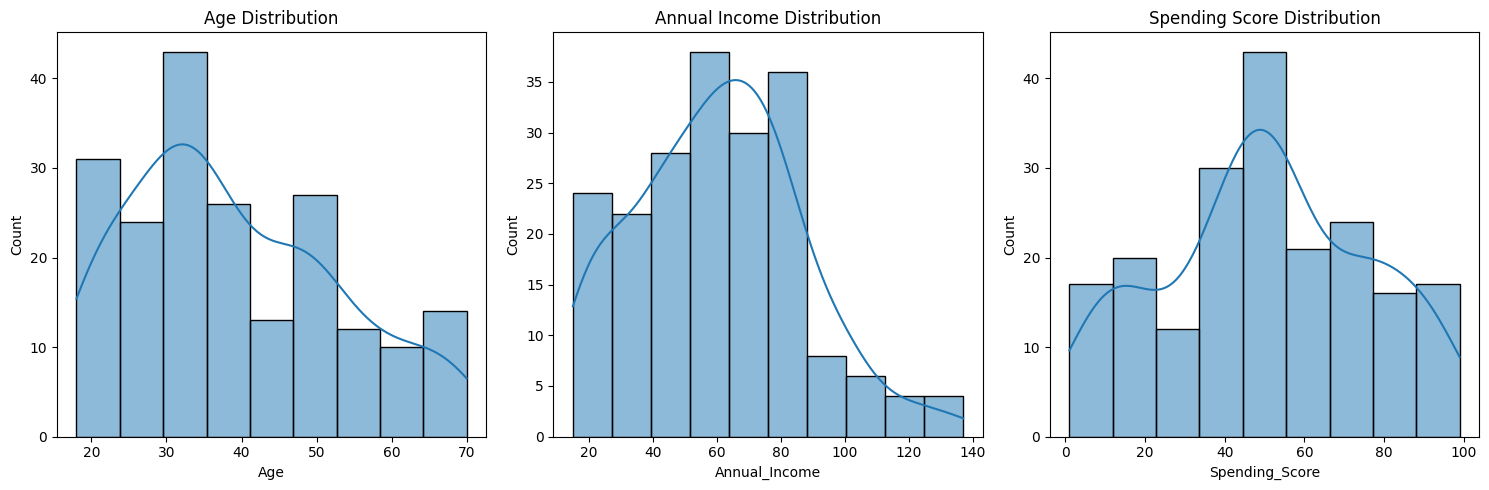

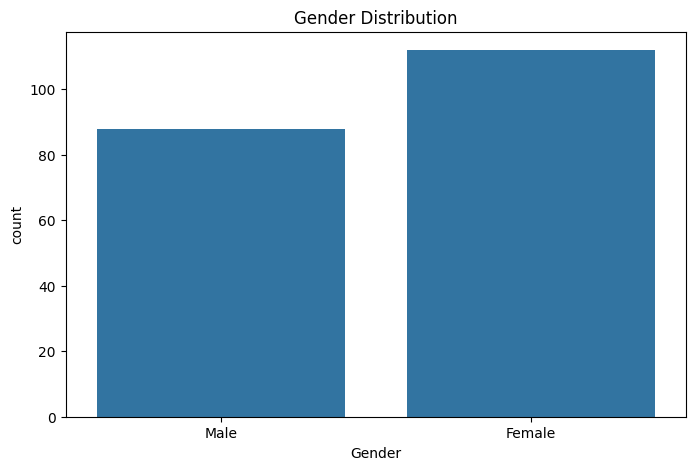

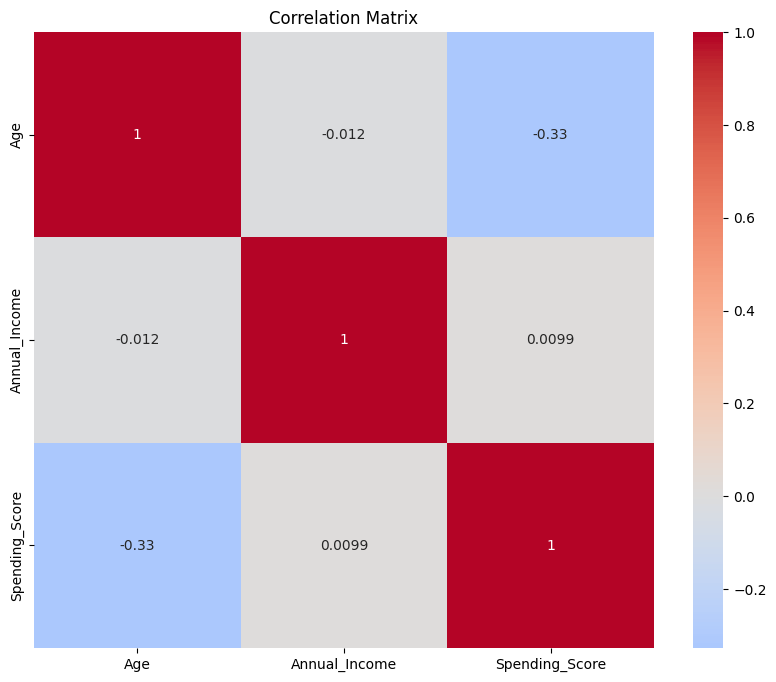


Step 4: Finding optimal number of clusters...


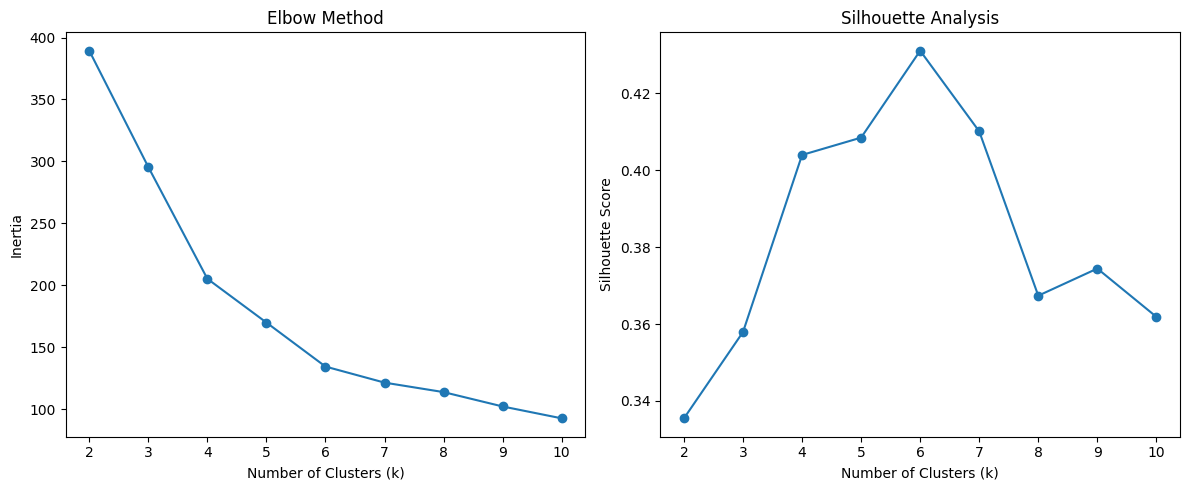


Optimal number of clusters: 6

Step 5: Performing clustering...


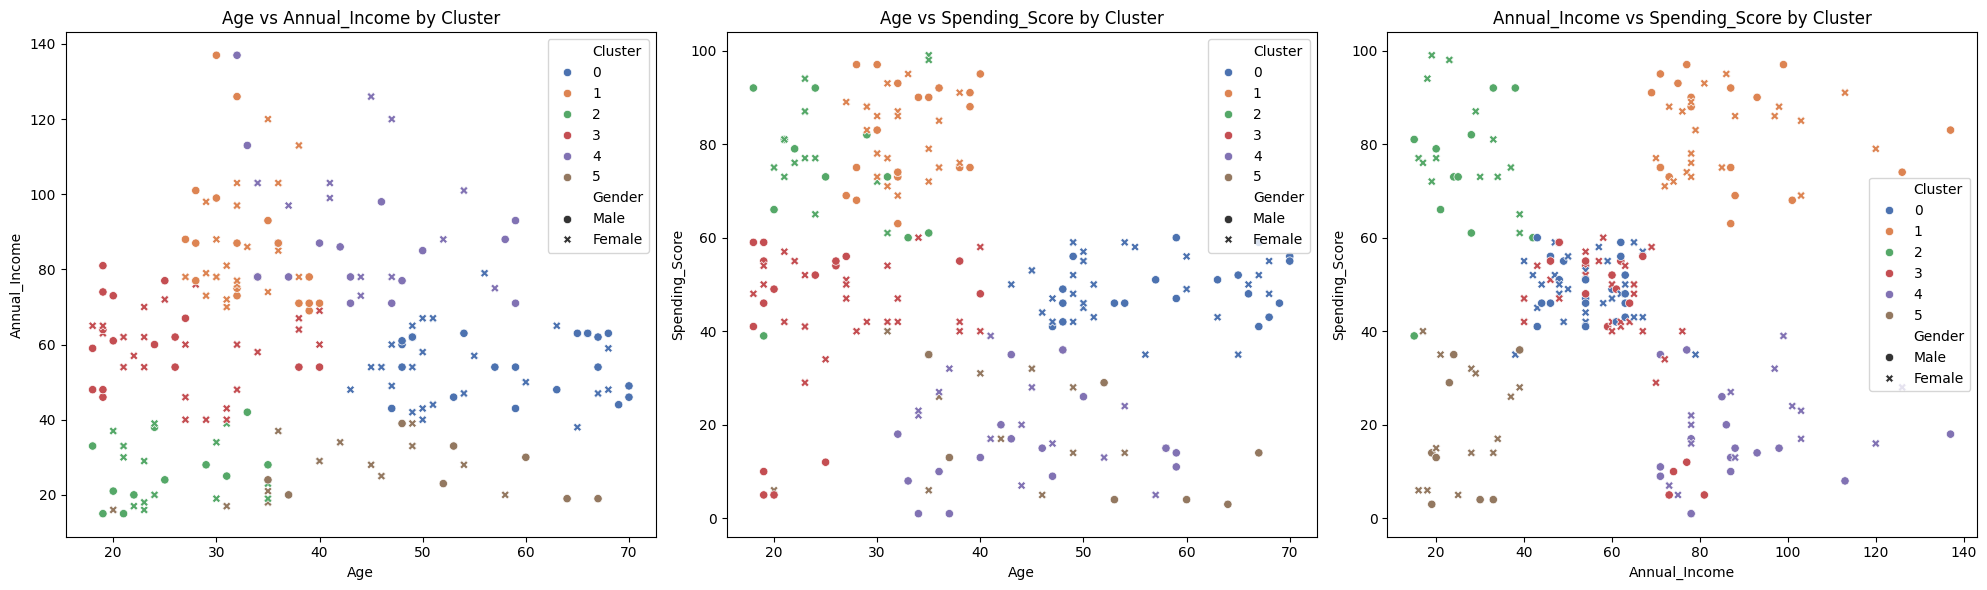


Step 6: Analyzing clusters...

Cluster Centers:
               Age  Annual_Income  Spending_Score
Cluster                                          
0        56.333333      54.266667       49.066667
1        32.692308      86.538462       82.128205
2        25.560000      26.480000       76.240000
3        26.125000      59.425000       44.450000
4        44.000000      90.133333       17.933333
5        45.523810      26.285714       19.380952


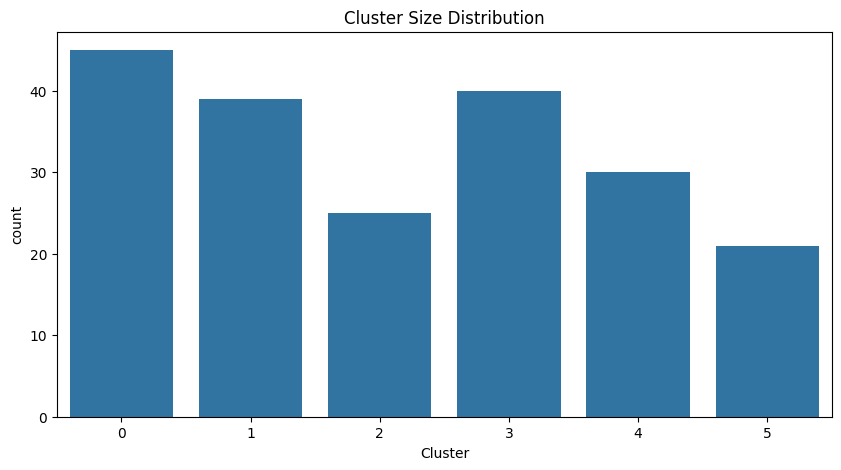

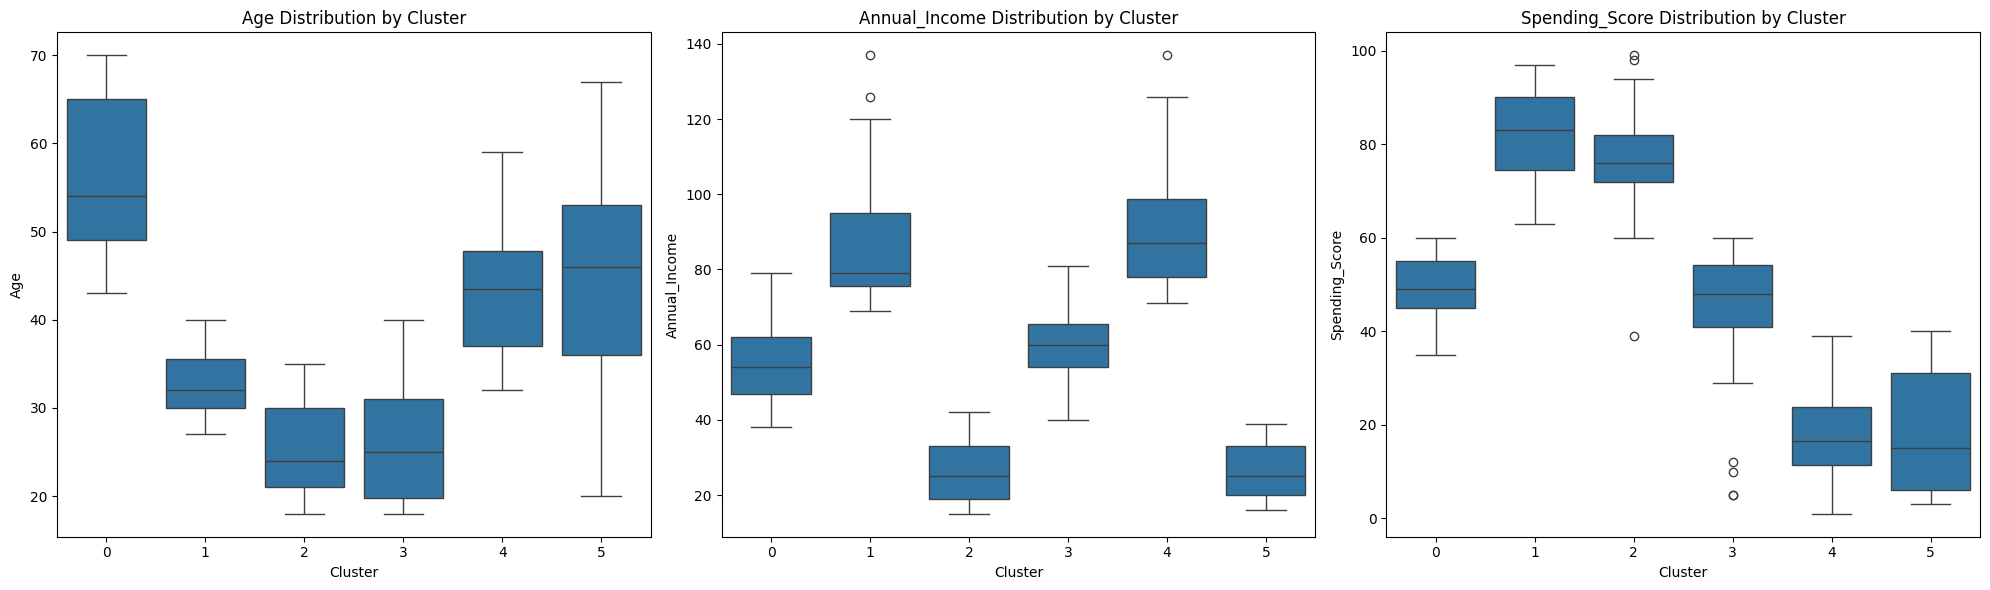

<Figure size 1200x600 with 0 Axes>

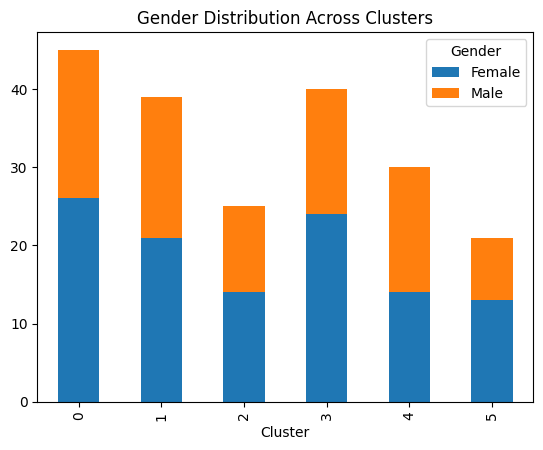


Step 7: Creating cluster profiles...

Cluster Profiles:

Cluster 0:
Cluster_Size: 45
Age_Mean: 56.333333333333336
Age_Range: 43-70
Income_Mean: 54.266666666666666
Income_Range: 38-79
Spending_Mean: 49.06666666666667
Spending_Range: 35-60
Gender_Ratio: {'Female': 0.5777777777777777, 'Male': 0.4222222222222222}

Cluster 1:
Cluster_Size: 39
Age_Mean: 32.69230769230769
Age_Range: 27-40
Income_Mean: 86.53846153846153
Income_Range: 69-137
Spending_Mean: 82.12820512820512
Spending_Range: 63-97
Gender_Ratio: {'Female': 0.5384615384615384, 'Male': 0.46153846153846156}

Cluster 2:
Cluster_Size: 25
Age_Mean: 25.56
Age_Range: 18-35
Income_Mean: 26.48
Income_Range: 15-42
Spending_Mean: 76.24
Spending_Range: 39-99
Gender_Ratio: {'Female': 0.56, 'Male': 0.44}

Cluster 3:
Cluster_Size: 40
Age_Mean: 26.125
Age_Range: 18-40
Income_Mean: 59.425
Income_Range: 40-81
Spending_Mean: 44.45
Spending_Range: 5-60
Gender_Ratio: {'Female': 0.6, 'Male': 0.4}

Cluster 4:
Cluster_Size: 30
Age_Mean: 44.0
Age_Range: 3

In [6]:
def main():
    # Create instance of CustomerSegmentation
    cs = CustomerSegmentation()

    # Step 1: Load data
    print("Step 1: Loading data...")
    cs.load_data()

    # Step 2: Preprocess data
    print("\nStep 2: Preprocessing data...")
    cs.preprocess_data()

    # Step 3: Explore data
    print("\nStep 3: Exploring data...")
    cs.explore_data()

    # Step 4: Find optimal number of clusters
    print("\nStep 4: Finding optimal number of clusters...")
    cs.find_optimal_clusters()

    # Step 5: Perform clustering
    print("\nStep 5: Performing clustering...")
    cs.perform_clustering()

    # Step 6: Analyze clusters
    print("\nStep 6: Analyzing clusters...")
    cs.analyze_clusters()

    # Step 7: Profile clusters
    print("\nStep 7: Creating cluster profiles...")
    cs.profile_clusters()

if __name__ == "__main__":
    main()